In [1]:
#Colleen Karnas-Haines
#3/30/2018
#This program analyzes sentiment of news media tweets
#Observations:
#1. At this particular point in time, the BBC is the only news source that has a positive compound score
#2. CBSNews is by far the most negative in regards to the compound score
#3. When looking at the individual tweets, one can see that CBSNews does not have any point that are extreme in negativity; therefore
# we conclude that there were not extremes pulling the mean doward, but instead a multitude of mildly negative tweets
# without cooresponding positive ones to bring the score up.

In [2]:
# Dependencies
import tweepy
import json
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from config import consumer_key, consumer_secret, access_token, access_token_secret
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
#Get the last 100 tweets from BBC, CBS, CNN, Fox, and New York times.
target_user = ("@BBC", "@CBSNews", "@CNN","@FoxNews", "@nytimes")
total_tweets = pd.DataFrame(columns=["Name","Tweet Order","Text","Compound","Positive","Negative","Neutral","Time","Adj Time"])


In [5]:
# Loop through each user

number_tweets=100
pagination=int(number_tweets/20)
for user in target_user:

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    tweet_times=[]
    order=0
    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(pagination):
        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, page=x)

        # Loop through all tweets
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            tweet_time=tweet["created_at"]
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            tweet_times.append(tweet_time)
        


            total_tweets=total_tweets.append({'Name':user, "Tweet Order":number_tweets-order, "Text":tweet["text"],
                                              'Compound':compound,"Positive":pos,
                                              "Negative":neg,"Neutral":neu,
                                              "Time":tweet_time}, ignore_index=True)
            order=order+1


            
total_tweets["Tweet Order"]= total_tweets["Tweet Order"].astype('int', copy=False)

    # Print the Averages
#     print("")
#     print("User: %s" % user)
#     print("Compound: %s" % np.mean(positive_list))
#     print("Positive: %s" % np.mean(positive_list))
#     print("Neutral: %s" % np.mean(neutral_list))
#     print("Negative: %s" % np.mean(negative_list))

In [6]:
len(total_tweets)

500

In [7]:
tweet_datetime=[]
for x in total_tweets["Time"]:
    tweet_datetime.append(datetime.strptime(x, "%a %b %d %H:%M:%S %z %Y"))
#tweet_time_objects.append(tweet_datetime)
total_tweets["Adj Time"]=tweet_datetime

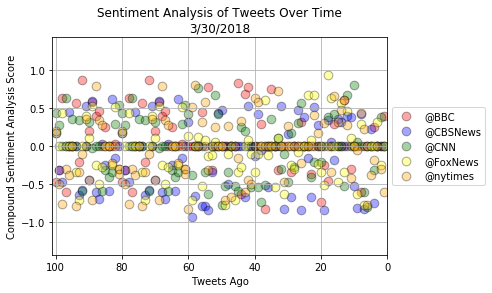

In [8]:
#Scatter plot for changing tumor volume for each trial

fig, ax = plt.subplots()
groups = total_tweets.groupby('Name')
colors = ["red", "blue","green", "yellow","orange"]
#
for i, (name, group) in enumerate(groups):
    group.plot(kind='scatter',  x="Tweet Order", y="Compound",s=75, 
               edgecolors="black",alpha=.35, label=name, ax=ax, color=colors[i])
lgd = ax.legend(numpoints=1)
ax.grid(b=True, which='major')
for handle in lgd.legendHandles:
    handle.set_sizes([100.0])
ax.set_ylim((min(total_tweets["Compound"])-0.5, max(total_tweets["Compound"]+0.5)))
ax.set_xlim((max(total_tweets["Tweet Order"]+1)),0)
plt.xlabel("Tweets Ago")
plt.ylabel("Compound Sentiment Analysis Score")
plt.title("Sentiment Analysis of Tweets Over Time\n3/30/2018")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('TweetsOverTime.png')
plt.show()

In [9]:

compound_means=pd.DataFrame(groups.mean())
BBC_mean=compound_means.loc["@BBC"]["Compound"]
CBS_mean=compound_means.loc["@CBSNews"]["Compound"]
CNN_mean=compound_means.loc["@CNN"]["Compound"]
Fox_mean=compound_means.loc["@FoxNews"]["Compound"]
NYT_mean=compound_means.loc["@nytimes"]["Compound"]
print(BBC_mean, CBS_mean,CNN_mean,Fox_mean,NYT_mean)

0.055272 -0.109863 -0.017477 -0.046971 -0.046703


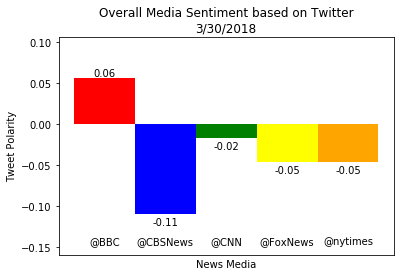

In [10]:
#Create a bar graph that compares the average new sentiment

N = 1
ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

#Capvals = ((cap_data.iloc[9,2]-cap_data.iloc[0,2])/cap_data.iloc[0,2])*100
rects1 = ax.bar(ind, BBC_mean, width, color="red", label="BBC")
#Infvals = ((inf_data.iloc[9,2]-inf_data.iloc[0,2])/inf_data.iloc[0,2])*100
rects2 = ax.bar(ind+width, CBS_mean, width, color="blue")
#Ketvals = ((ket_data.iloc[9,2]-ket_data.iloc[0,2])/ket_data.iloc[0,2])*100
rects3 = ax.bar(ind+width*2, CNN_mean, width, color="green")
#Plavals = ((pla_data.iloc[9,2]-pla_data.iloc[0,2])/pla_data.iloc[0,2])*100
rects4 = ax.bar(ind+width*3, Fox_mean, width, color="yellow")
rects5 = ax.bar(ind+width*4, NYT_mean, width, color="orange")
plt.title("Overall Media Sentiment based on Twitter\n3/30/2018")
ax.set_ylim(( min(BBC_mean, CBS_mean,CNN_mean,Fox_mean,NYT_mean)-0.05), max(BBC_mean, CBS_mean,CNN_mean,Fox_mean,NYT_mean)+0.05)

ax.set_ylabel('Tweet Polarity')
ax.set_xlabel('News Media')
# ax.set_xticks(ind+width*1.5)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')
x_labels = ['@BBC', '@CBSNews', '@CNN','@FoxNews',"@nytimes"]
ax.set_xticklabels(x_labels)
bottom_pos=min(BBC_mean, CBS_mean,CNN_mean,Fox_mean,NYT_mean)-0.04
def autolabel(rects, name):
    for rect in rects:
        h = rect.get_height()
        if h<0:
            label_position=h-.016
        else:
            label_position=h
        ax.text(rect.get_x()+rect.get_width()/2., label_position, "%.2f" % h,
                ha='center', va='bottom')
        ax.text(rect.get_x()+rect.get_width()/2., bottom_pos, name,
                ha='center', va='bottom')
autolabel(rects1,"@BBC")
autolabel(rects2, "@CBSNews")
autolabel(rects3, "@CNN")
autolabel(rects4,"@FoxNews")
autolabel(rects5,"@nytimes")
plt.savefig('OverAllMediaSentiment.png')

plt.show()

In [11]:
total_tweets.to_csv("MediaTweets.csv")
total_tweets.head()

,Name,Tweet Order,Text,Compound,Positive,Negative,Neutral,Time,Adj Time
0,@BBC,100,Everyone is at rock bottom. And then Matt make...,-0.4767,0.000,0.154,0.846,Fri Mar 30 20:23:06 +0000 2018,2018-03-30 20:23:06+00:00
1,@BBC,99,😱👀 When a cheetah interrupts your safari. http...,-0.3182,0.000,0.277,0.723,Fri Mar 30 19:00:32 +0000 2018,2018-03-30 19:00:32+00:00
2,@BBC,98,RT @BBCOne: The search is on for Britain’s Bes...,0.6369,0.219,0.000,0.781,Fri Mar 30 18:41:56 +0000 2018,2018-03-30 18:41:56+00:00
3,@BBC,97,😂 'JESUS DID NOT HAVE CUSTARD CREAMS!'\n\nDon'...,-0.5983,0.000,0.196,0.804,Fri Mar 30 18:01:02 +0000 2018,2018-03-30 18:01:02+00:00
4,@BBC,96,"An Oscar-winning short film, The Silent Child ...",0.0000,0.000,0.000,1.000,Fri Mar 30 17:29:06 +0000 2018,2018-03-30 17:29:06+00:00
